# CSE327 Homework2
**Due date: 23:59 on March 21, 2021 (Sunday)**

---
In this semester, we will use Google Colab for the assignments, which allows us to utilize resources that some of us might not have in their local machines such as GPUs. You will need to use your Stony Brook (*.stonybrook.edu) account for coding and Google Drive to save your results.

## Google Colab Tutorial
---
Go to https://colab.research.google.com/notebooks/, you will see a tutorial named "Welcome to Colaboratory" file, where you can learn the basics of using google colab.

Settings used for assignments: ***Edit -> Notebook Settings -> Runtime Type (Python 3)***.


## Local Machine Prerequisites
---
Since we are using Google Colab, all the code is run on the server environment where lots of libraries or packages have already been installed. In case of missing 
 libraries or if you want to install them in your local machine, below are the links for installation.
* **Install Python 3.6**: https://www.python.org/downloads/ or use Anaconda (a Python distribution) at https://docs.continuum.io/anaconda/install/. Below are some materials and tutorials which you may find useful for learning Python if you are new to Python.
  - https://docs.python.org/3.6/tutorial/index.html
  - https://www.learnpython.org/
  - http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html
  - http://www.scipy-lectures.org/advanced/image_processing/index.html


* **Install Python packages**: install Python packages: `numpy`, `matplotlib`, `opencv-python` using pip, for example:
```
pip install numpy matplotlib opencv-python
``` 
	Note that when using “pip install”, make sure that the version you are using is python3. Below are some commands to check which python version it uses in you machine. You can pick one to execute:
  
```  
    pip show pip

    pip --version

    pip -V

```

Incase of wrong version, use pip3 for python3 explictly.

* **Install Jupyter Notebook**: follow the instructions at http://jupyter.org/install.html to install Jupyter Notebook and familiarize yourself  with it. *After you have installed Python and Jupyter Notebook, please open the notebook file 'HW1.ipynb' with your Jupyter Notebook and do your homework there.*

## Description
---
In this homework you will experiment with SIFT features for scene matching and object recognition. You will work with the SIFT tutorial and code from the University of Toronto. In the compressed homework file, you will find the tutorial document (tutSIFT04.pdf) and a paper from the International Journal of Computer Vision (ijcv04.pdf) describing SIFT and object recognition. Although the tutorial document assumes matlab implemention, you should still be able to follow the technical details in it. In addition, you are **STRONGLY** encouraged to read this paper unless you’re already quite familiar with matching and recognition using SIFT.

There are 2 problems in this homework with a total of 100 points. Be sure to read **Submission Guidelines** below. They are important.



## Using SIFT in OpenCV 3.x.x in Local Machine
---
Feature descriptors like SIFT and SURF are no longer included in OpenCV since version 3. This section provides instructions on how to use SIFT for those who use OpenCV 3.x.x. If you are using OpenCV 2.x.x then you are all set, please skip this section. Read this if you are curious about why SIFT is removed https://www.pyimagesearch.com/2015/07/16/where-did-sift-and-surf-go-in-opencv-3/.

**We strongly recommend you to use SIFT methods in Colab for this homework**, the details will be described in the next section.

However, if you want to use SIFT in your local machine, one simple way to use the OpenCV in-built function `SIFT` is to switch back to version 2.x.x, but if you want to keep using OpenCV 3.x.x, do the following:
1. uninstall your original OpenCV package
2. install opencv-contrib-python using pip (pip is a Python tool for installing packages written in Python), please find detailed instructions at https://pypi.python.org/pypi/opencv-contrib-python

After you have your OpenCV set up, you should be able to use `cv2.xfeatures2d.SIFT_create()` to create a SIFT object, whose functions are listed at http://docs.opencv.org/3.0-beta/modules/xfeatures2d/doc/nonfree_features.html

## Using SIFT in OpenCV 3.x.x in Colab (RECOMMENDED)
---
The default version of OpenCV in Colab is 3.4.3. If we use SIFT method directly, typically we will get this error message:

```
error: OpenCV(3.4.3) /io/opencv_contrib/modules/xfeatures2d/src/sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'

```

One simple way to use the OpenCV in-built function `SIFT` in Colab is to switch the version to the one from 'contrib'. Below is an example of switching OpenCV version:

1. Run the following command in one section in Colab, which has already been included in this assignment:
```
pip install opencv-contrib-python==3.4.2.17
```
2. Restart runtime by
```
Runtime -> Restart Runtime
```

Then you should be able to use use `cv2.xfeatures2d.SIFT_create()` to create a SIFT object, whose functions are listed at http://docs.opencv.org/3.0-beta/modules/xfeatures2d/doc/nonfree_features.html

## Some Resources
---
In addition to the tutorial document, the following resources can definitely help you in this homework:
- http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html
- http://docs.opencv.org/3.1.0/da/df5/tutorial_py_sift_intro.html
- http://docs.opencv.org/3.0-beta/modules/xfeatures2d/doc/nonfree_features.html?highlight=sift#cv2.SIFT
- http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

In [237]:
# pip install the OpenCV version from 'contrib'
!pip install opencv-contrib-python==3.4.2.17

In [238]:
# import packages here
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
print(cv2.__version__) # verify OpenCV version

3.4.2


In [239]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [240]:
# Set your working directory (in your google drive)
#   change it to your specific homework directory.
%cd 'gdrive/My Drive/Class/Year2/sem2/CSE327/CSE327-HW2-Spring21/'

[Errno 2] No such file or directory: 'gdrive/My Drive/Class/Year2/sem2/CSE327/CSE327-HW2-Spring21/'
/content/gdrive/.shortcut-targets-by-id/1kyWMPcVAc4-xLUnOtjAT4R9EgRn4zFUm/Class/Year2/sem2/CSE327/CSE327-HW2-Spring21


## Problem 1: Match transformed images using SIFT features
{60 points} You will transform a given image, and match it back to the original image using SIFT keypoints.

- **Step 1 (10pt)**. Use the function from SIFT class to detect keypoints from the given image. Plot the image with keypoints scale and orientation overlaid.

- **Step 2 (10pt)**. Rotate your image clockwise by 60 degrees with the `cv2.warpAffine` function. Extract SIFT keypoints for this rotated image and plot the rotated picture with keypoints scale and orientation overlaid just as in step 1.

- **Step 3 (15pt)**. Match the SIFT keypoints of the original image and the rotated imag using the `knnMatch` function in the `cv2.BFMatcher` class. Discard bad matches using the ratio test proposed by D.Lowe in the SIFT paper. Use **0.1** as the ratio in this homework. Note that this is for display purpose only. Draw the filtered good keypoint matches on the image and display it. The image you draw should have two images side by side with matching lines across them.

- **Step 4 (15pt)**. Use the RANSAC algorithm to find the affine transformation from the rotated image to the original image. You are not required to implement the RANSAC algorithm yourself, instead you could use the `cv2.findHomography` function (set the 3rd parameter `method` to `cv2.RANSAC`) to compute the transformation matrix. Transform the rotated image back using this matrix and the `cv2.warpPerspective` function. Display the recovered image.

- **Step 5 (10pt)**. You might have noticed that the rotated image from step 2 is cropped. Try to rotate the image without any cropping.

Hints: In case of too many matches in the output image, use the ratio of 0.1 to filter matches.

Transformation Matrix = 
 [[ 4.99853824e-01  8.66134099e-01 -3.74003362e+02]
 [-8.66182935e-01  5.00107534e-01  6.48329825e+02]
 [-1.51856684e-07  1.03493183e-07  1.00000000e+00]]


(-0.5, 1131.5, 863.5, -0.5)

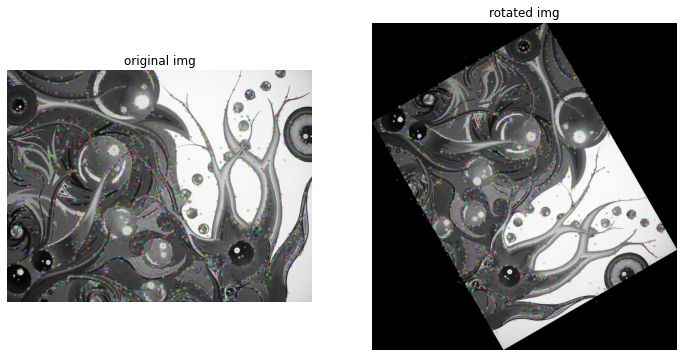

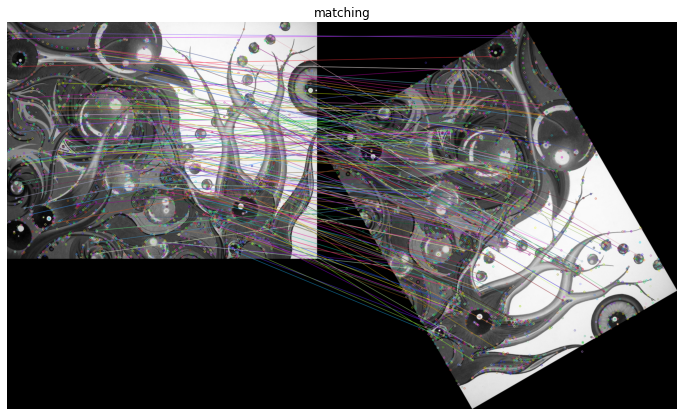

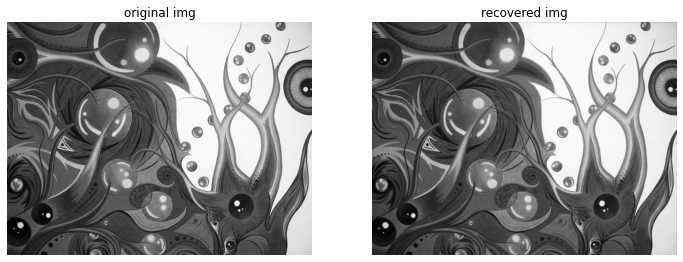

In [241]:
def drawMatches(img1, kp1, img2, kp2, matches):
    """
    My own implementation of cv2.drawMatches as OpenCV 2.4.9
    does not have this function available but it's supported in
    OpenCV 3.0.0

    This function takes in two images with their associated 
    keypoints, as well as a list of DMatch data structure (matches) 
    that contains which keypoints matched in which images.

    An image will be produced where a montage is shown with
    the first image followed by the second image beside it.

    Keypoints are delineated with circles, while lines are connected
    between matching keypoints.

    img1,img2 - Grayscale images
    kp1,kp2 - Detected list of keypoints through any of the OpenCV keypoint 
              detection algorithms
    matches - A list of matches of corresponding keypoints through any
              OpenCV keypoint matching algorithm
    """

    # Create a new output image that concatenates the two images together
    # (a.k.a) a montage
    rows1 = img1.shape[0]
    cols1 = img1.shape[1]
    rows2 = img2.shape[0]
    cols2 = img2.shape[1]

    # Create the output image
    # The rows of the output are the largest between the two images
    # and the columns are simply the sum of the two together
    # The intent is to make this a colour image, so make this 3 channels
    out = np.zeros((max([rows1,rows2]),cols1+cols2,3), dtype='uint8')

    # Place the first image to the left
    out[:rows1,:cols1] = np.dstack([img1, img1, img1])

    # Place the next image to the right of it
    out[:rows2,cols1:] = np.dstack([img2, img2, img2])

    # For each pair of points we have between both images
    # draw circles, then connect a line between them
    for mat in matches:

        # Get the matching keypoints for each of the images
        img1_idx = mat.queryIdx
        img2_idx = mat.trainIdx

        # x - columns
        # y - rows
        (x1,y1) = kp1[img1_idx].pt
        (x2,y2) = kp2[img2_idx].pt

        # Draw a small circle at both co-ordinates
        # radius 4
        # colour blue
        # thickness = 1
        cv2.circle(out, (int(x1),int(y1)), 4, (255, 0, 0), 1)   
        cv2.circle(out, (int(x2)+cols1,int(y2)), 4, (255, 0, 0), 1)

        # Draw a line in between the two points
        # thickness = 1
        # colour blue
        cv2.line(out, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), (0,255,0), 2)

    # Also return the image if you'd like a copy
    return out

# Read image
img_input = cv2.imread('SourceImages/sift_input.jpg', 0)

# initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
keypoints1, des1 = sift.detectAndCompute(img_input, None)

# Darw keypoints on the image
# ===== This is your first output =====
res1 = cv2.drawKeypoints(img_input, keypoints1, None)

# rotate image
height = img_input.shape[0]
width = img_input.shape[1]
center = (width/2, height/2)
angle = 60
angle = angle * np.pi / 180

rot_mat = [[np.cos(angle), -1*np.sin(angle), (1-np.cos(angle))*center[0]+np.sin(angle)*center[1]],[np.sin(angle), np.cos(angle), (-1*np.sin(angle))*center[0]+(1-np.cos(angle))*center[1]]]
rot_mat = np.array(rot_mat)

new_width = int(height*np.sin(angle) + width*np.cos(angle))
new_height = int(height*np.cos(angle) + width*np.sin(angle))

rot_mat[0,2] += new_width/2 - center[0]
rot_mat[1,2] += new_height/2 - center[1]

#rot_mat = cv2.getRotationMatrix2D(center, -60, 1)
rotate_img_input = cv2.warpAffine(img_input, rot_mat, (new_width, new_height))

# find the keypoints and descriptors on the rotated image
keypoints2, des2 = sift.detectAndCompute(rotate_img_input, None)

# Darw keypoints on the rotated image
# ===== This is your second output =====
res2 = cv2.drawKeypoints(rotate_img_input, keypoints2, None)

# ====== Plot functions, DO NOT CHANGE =====
# Plot result images
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.imshow(res1, 'gray')
plt.title('original img')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(res2, 'gray')
plt.title('rotated img')
plt.axis('off')
# ==========================================

# compute feature matching
bf = cv2.BFMatcher.create(cv2.NORM_L1, False)
keypoints1 = np.array(keypoints1)
keypoints2 = np.array(keypoints2)
matches = bf.knnMatch(des1, des2, k = 2)

# Apply ratio test
good_matches = [] # Append filtered matches to this list
for i, j in matches:
  if(i.distance < 0.1 * j.distance):
    good_matches.append(i)

# draw matching results with the given drawMatches function
# ===== This is your third output =====
res3 = cv2.drawMatches(img_input, keypoints1, rotate_img_input, keypoints2, good_matches, None)

# ====== Plot functions, DO NOT CHANGE =====
plt.figure(figsize=(12,8))
plt.imshow(res3)
plt.title('matching')
plt.axis('off')
# ==========================================

# estimate similarity transform
if len(good_matches) > 4:

  points1 = []
  points2 = []

  for m in good_matches:
    points1.append(keypoints1[m.queryIdx].pt)
    points2.append(keypoints2[m.trainIdx].pt)

  points1 = np.array(points1).reshape(-1, 1, 2)
  points2 = np.array(points2).reshape(-1, 1, 2)

  # find perspective transform matrix using RANSAC
  rot, mask = cv2.findHomography(points2, points1, cv2.RANSAC)
  print("Transformation Matrix = \n", rot)

  # mapping rotataed image back with the calculated rotation matrix
  # ===== This is your fourth output =====
  res4 = cv2.warpPerspective(rotate_img_input, rot, (width, height)) 
else:
  print("Not enough matches are found - %d/%d" % (len(good_matches),4))

# ====== Plot functions, DO NOT CHANGE =====
# plot result images
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.imshow(img_input, 'gray')
plt.title('original img')
plt.axis('off')
    
plt.subplot(1, 2, 2)
plt.imshow(res4, 'gray')
plt.title('recovered img')  
plt.axis('off')
# ==========================================

## Problem 2: Object Recognition with HOG features
{40 points} You will use the histogram of oriented gradients (HOG) to extract features from objects and recognize them.

HOG decomposes an image into multiple cells, computes the direction of the gradients for all pixels in each cell, and creates a histogram of gradient orientation for that cell. Object recognition with HOG is usually done by extracting HOG features from a training set of images, learning a support vector machine (SVM) from those features, and then testing a new image with the SVM to determine the existence of an object.

You can use `cv2.HOGDescriptor` to extract the HoG feature and `cv2.ml.SVM_create` for SVMs (and a lot of other algorithms). You can also use Python machine learning packages for SVM, e.g.`scikit-learn` and for HoG computation, e.g. `scikit-image`. Please find the OpenCV SVM tutorial at https://www.learnopencv.com/handwritten-digits-classification-an-opencv-c-python-tutorial/.

An image set located under SourceImages/human_vs_birds is provided containing 20 images. You will first train an SVM with the HoG features and then predict the class of an image with the trained SVM. For simplicity, we will be dealing with a binary classification problem with two classes, namely, birds and humans. There are 10 images for each class.

Some of the function names and arguments are provided, you may change them as you see fit.

- **Step 1 (5pts)**. Load in the images and create a vector of corresponding labels (0 for bird and 1 for human). An example label vector should be something like [1,1,1,1,1,0,0,0,0,0]. Shuffle the images randomly and display them in a 2 x 10 grid with figsize = (18, 15).

- **Step 2 (15pts)**. Extract HoG features from all images. You can use the OpenCV function `cv2.HOGDescriptor` or hog routine from `scikit-image`. Display the HoG features for all images in a 2 x 10 grid with figsize = (18, 15).

- **Step 3**. Use the first 16 examples from the shuffled dataset as training data on which to train an SVM. The rest 4 are used as test data. Reshape the HoG feature matrix as necessary to feed into the SVM. Train the classifier. **DO NOT train with test data.** No output is expected from this part.

- **Step 4 (20pts)**. Perform predictions with your trained SVM on the test data. Output a vector of predictions, a vector of ground truth labels, and prediction accuracy.

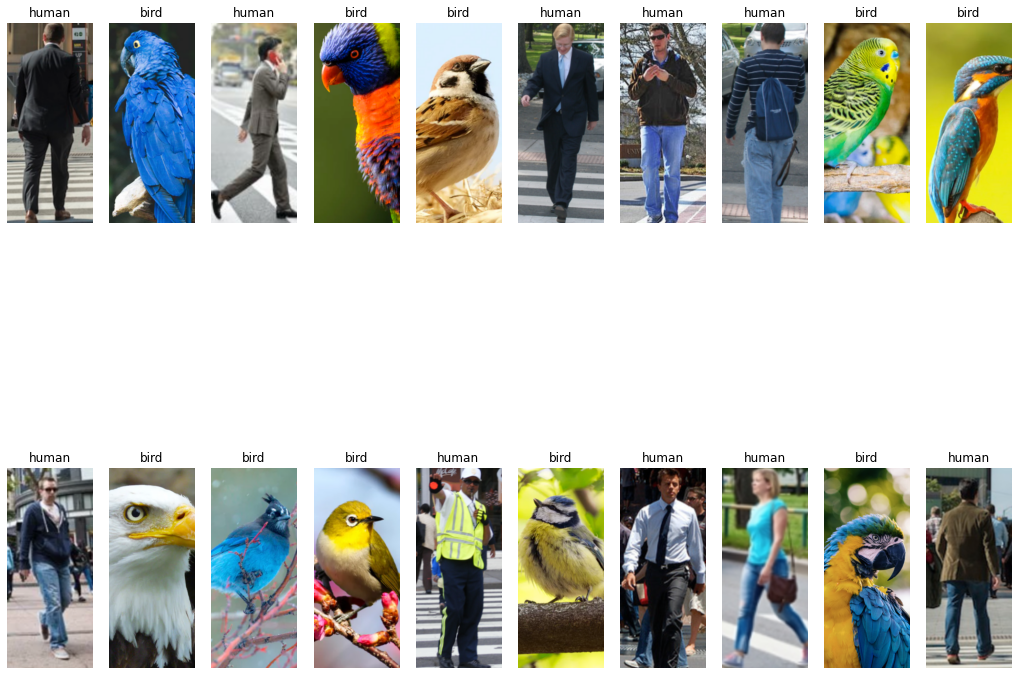

In [242]:
import skimage.exposure
from skimage.feature import hog
from sklearn.svm import LinearSVC

# load data
def loadData(file):
  img = cv2.imread(file)
  return cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

images = []
labels = []

# load birds
for i in range(1, 11):
  images.append(loadData('SourceImages/human_vs_birds/bird_' + str(i) + '.png'))
  labels.append(0)

# load humans
for i in range(1, 11):
  images.append(loadData('SourceImages/human_vs_birds/human_' + str(i) + '.png'))
  labels.append(1)

images = np.array(images)
labels = np.array(labels)

# shuffle
randomize = np.random.permutation(len(images))
images = images[randomize]
labels = labels[randomize]
  

# ===== Display your first graph here =====
plt.figure(figsize=(18,15))

for i in range(0, len(images)):
  plt.subplot(2, 10, i+1)
  plt.imshow(images[i])
  plt.title('human' if labels[i] == 1 else 'bird')
  plt.axis('off')


# create a vector of labels
# assume labels: bird = 0, human = 1

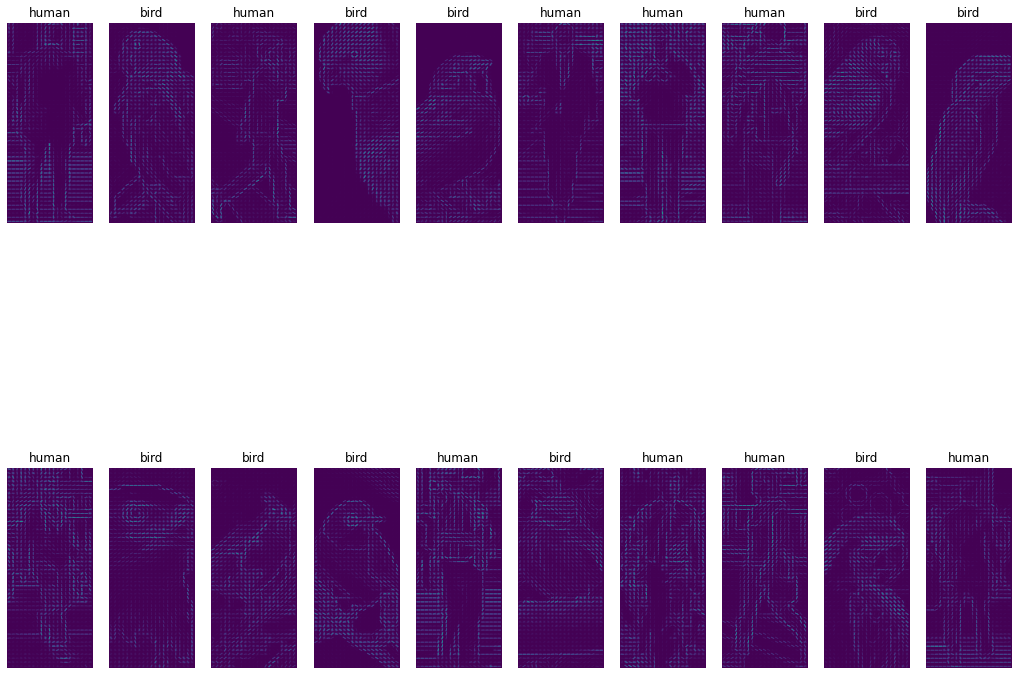

In [243]:
# Compute HOG features for the images
def computeHOGfeatures(image):
  fd, hog_image = hog(image, visualize=True, feature_vector=True)
  return hog_image
    # Implement your computeHOGfeatures() here

# Compute HOG descriptors
hog_images = []
hog_features = []
for i in images:
  hog_image = computeHOGfeatures(i)
  hog_features.append(features)
  hog_images.append(hog_image)
hog_images = np.array(hog_images)

# ===== Display your second graph here =====
plt.figure(figsize=(18,15))

for i in range(0, len(images)):
  plt.subplot(2, 10, i+1)
  plt.imshow(hog_images[i])
  plt.title('human' if labels[i] == 1 else 'bird')
  plt.axis('off')

# Split the data and labels into train and test set
train_images = images[0:16]
train_labels = labels[0:16]
train_hog_images = hog_images[0:16]

test_images = images[16:]
test_labels = labels[16:]
test_hog_images = hog_images[16:]

# reshape feature matrix
train_hog_images = train_hog_images.reshape((16, train_hog_images.size//16))
train_hog_images = train_hog_images.astype('float32')
test_hog_images = test_hog_images.reshape((4, test_hog_images.size//4))
test_hog_images = test_hog_images.astype('float32')


In [244]:
# train model with SVM
# call LinearSVC
# train SVM
# call clf.predict
clf = cv2.ml.SVM_create()
clf.setType(cv2.ml.SVM_C_SVC)
clf.setKernel(cv2.ml.SVM_LINEAR)

train_labels = train_labels.astype(np.int32)

clf.train(train_hog_images, cv2.ml.ROW_SAMPLE, train_labels)

x = clf.predict(test_hog_images)[1].flatten().astype(np.int32)
# ===== Output functions ======
print('estimated labels: ', x)
print('ground truth labels: ', test_labels)

count = 0.0
for i in range(0, len(x)):
  if x[i] == test_labels[i]:
    count = count+1
print('Accuracy: ', count/len(x)*100, '%')

estimated labels:  [1 1 0 1]
ground truth labels:  [1 1 0 1]
Accuracy:  100.0 %


## Submission guidelines
---
Please submit a pdf file that includes a ***google shared link***(explained in the next paragraph) through blackboard. This pdf file should be named as **Surname_Givenname_SBUID_hw*.pdf** (example: Jordan_Michael_111134567_hw2.pdf for this assignment).

To generate the ***google shared link***, first create a folder named ***Surname_Givenname_SBUID_hw*.*** (example: Jordan_Michael_111134567_hw2 for this assignment) in your Google Drive with your Stony Brook account. The structure of the files in the folder should be exactly the same as the one you downloaded. For instance in this homework:

```
Jordan_Michael_111134567_hw2
        |---SourceImages
        |---Jordan_Michael_111134567_hw2.ipynb
        |---Jordan_Michael_111134567_hw2.pdf
```
Note that this folder should be in your Google Drive with your Stony Brook account.

Then right click this folder, click ***Get shareable link (with edit access)***, in the People textfield, enter the TA's email: ***qiaomu.miao@stonybrook.edu***. Make sure that TAs who have the link **can edit**, ***not just*** **can view**, and also **uncheck** the **Notify people** box.

Note that in google colab, we will only grade the version of the code right before the timestamp of the submission made in blackboard. 

Extract the downloaded .zip file to a folder of your preference. The input and output paths are predefined and **DO NOT** change them, (we assume that 'Surname_Givenname_SBUID_hw2' is your working directory, and all the paths are relative to this directory).  The image read and write functions are already written for you. All you need to do is to fill in the blanks as indicated to generate proper outputs.


-- DO NOT change the folder structure, please just fill in the blanks. <br>

You are encouraged to post and answer questions on Piazza. Based on the amount of email that we have received in past years, there might be dealys in replying to personal emails. Please ask questions on Piazza and send emails only for personal issues.

If you alter the folder structures, the grading of your homework will be significantly delayed and possibly penalized.

Be aware that your code will undergo plagiarism check both vertically and horizontally. Please do your own work.

Late submission penalty: <br>
There will be a 10% penalty per day for late submission. However, you will have 4 days throughout the whole semester to submit late without penalty. Note that the grace period is calculated by days instead of hours. If you submit the homework one minute after the deadline, one late day will be counted. Likewise, if you submit one minute after the deadline, the 10% penaly will be imposed if not using the grace period.
